In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
import sys
if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")

# Define all functions

In [11]:
# define function that calculates the potential energy
def U(q, mu, cov):
    return 0.5 * (q - mu).T @ np.linalg.inv(cov) @ (q - mu)

# computes the gradient of the potential energy 
def grad_U(q, mu, cov):
    return np.linalg.inv(cov) @ (q - mu)

# compute kinetic energy
def K(p):
    return 0.5 * p.T @ p

# leapfrog step of the HMC
def leapfrog(q, p, eps, mu, cov, steps):
    q_values = []
    p_values = []
    for i in range(steps):
        # half step
        p_half = p - 0.5 * eps * grad_U(q, mu, cov)
        # full position step
        q = q + eps * p_half
        # half momentum step
        p = p_half - 0.5 * eps * grad_U(q, mu, cov)
        
        q_values.append(q)
        p_values.append(p)

    return q_values, p_values

def hmc(mu, cov, eps, num_samples=200, num_leapfrog_steps=100):
    # Initialize position q and p 
    q = mu.copy()
    p = q
    # create samples list
    samples = [q]
    # generate samples
    for i in range(num_samples):
        p_new = np.random.randn(*q.shape)
        q_new, p_star = q, p_new
        # perform leapfrog step
        q_values, p_values = leapfrog(q_new, p_star, eps, mu, cov, num_leapfrog_steps)
        q_new, p_star = q_values[-1], p_values[-1]
        
        prob_accept = min(1, np.exp(U(q, mu, cov) - U(q_new, mu, cov) + K(p_new) - K(p)))
        u = np.random.rand()
        # rejecting the samples
        if u < prob_accept:
            q = q_new
        else:
            p_new = -p_new
        samples.append(q)
        
    return np.array(samples)

# Setup hyperparameters

In [3]:
mu = np.array([0, 0])
sigma_X = 1
sigma_Y = 1
correlations = [0, 0.8]

# 1. trajactories of various $\epsilon$ with T = 100. Intial position is set to [0.5, 0]

#### Plot the trajectories for each correlations on 1,2 row and 3,4 row seperately. And 1,3 rows are for q1 position, and 2,4 rows are for q2 position.

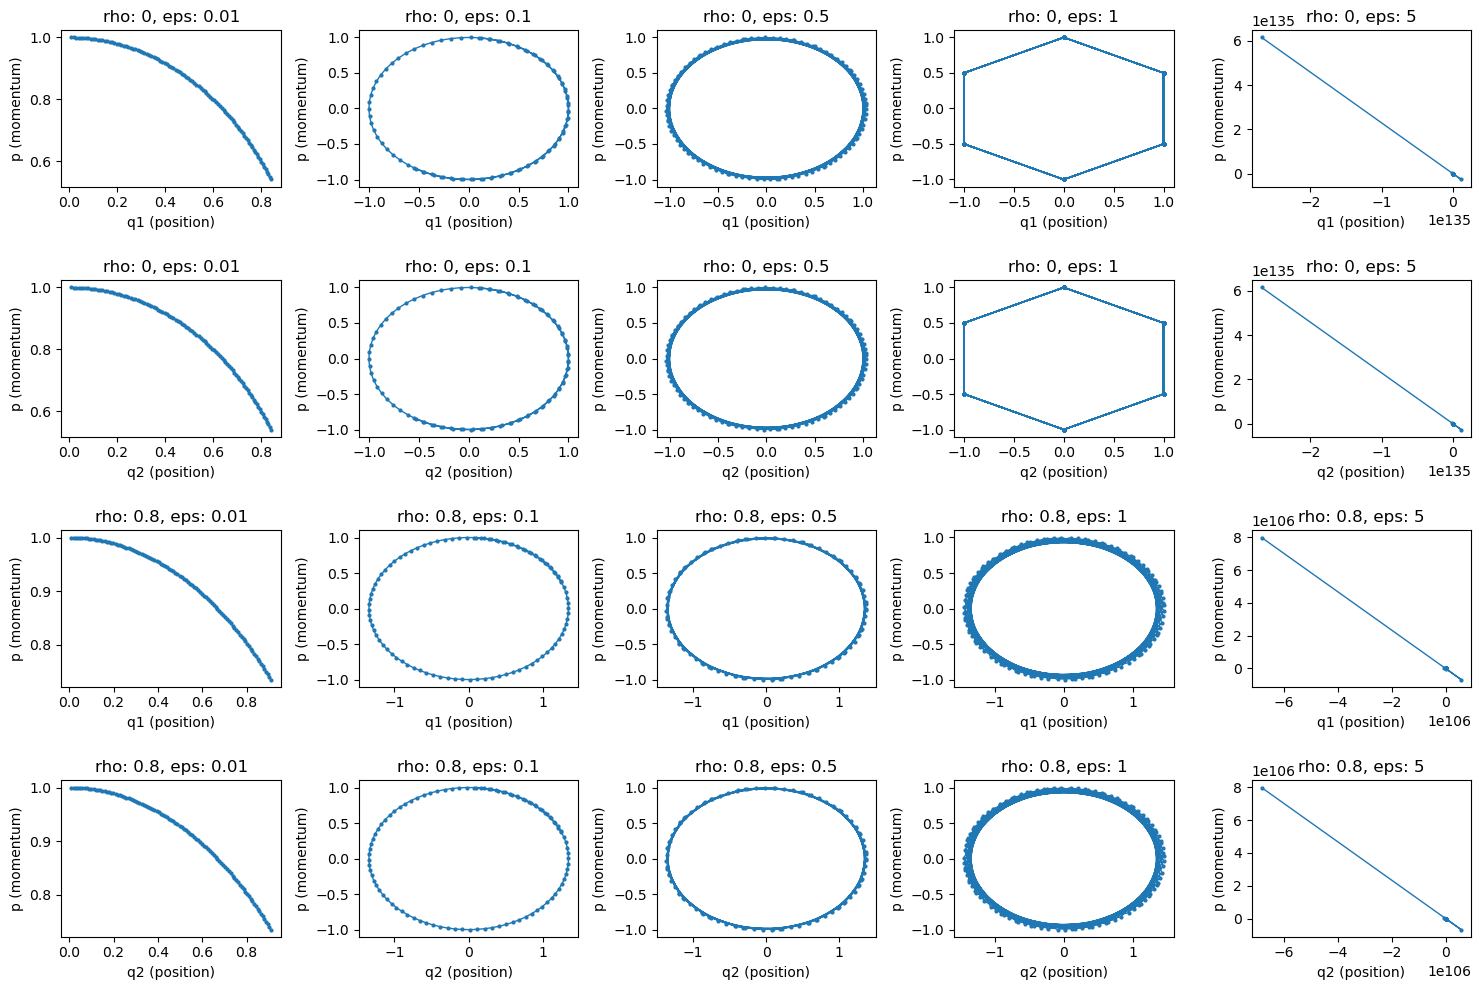

In [12]:
epsilons = [0.01, 0.1, 0.5, 1,5]
fig, axes = plt.subplots(4, len(epsilons), figsize=(15, 10))
for i, rho in enumerate(correlations):
    for j, eps in enumerate(epsilons):
        cov = np.array([[sigma_X**2, rho * sigma_X * sigma_Y], [rho * sigma_X * sigma_Y, sigma_Y**2]])        
        # Initial position and momentum
        q_init = np.array([0, 0])
        p_init = np.array([1, 1])
        steps = 100       
        q_values, p_values = leapfrog(q_init, p_init, eps, mu, cov, steps)       
        q1 = np.array([q[0] for q in q_values])
        q2 = np.array([q[1] for q in q_values])
        p = np.array([p[0] for p in p_values])
        
        axes[2 * i, j].plot(q1, p, 'o-', lw=1, markersize=2)
        axes[2 * i, j].set_title(f'rho: {rho}, eps: {eps}')
        axes[2 * i, j].set_xlabel('q1 (position)')
        axes[2 * i, j].set_ylabel('p (momentum)')       
        axes[2 * i + 1, j].plot(q2, p, 'o-', lw=1, markersize=2)
        axes[2 * i + 1, j].set_title(f'rho: {rho}, eps: {eps}')
        axes[2 * i + 1, j].set_xlabel('q2 (position)')
        axes[2 * i + 1, j].set_ylabel('p (momentum)')

plt.tight_layout()
plt.show()

# 2. Plot samples with different $\lambda$ and $\epsilon$. Intial position is [0,0]

## for $\rho = 0$

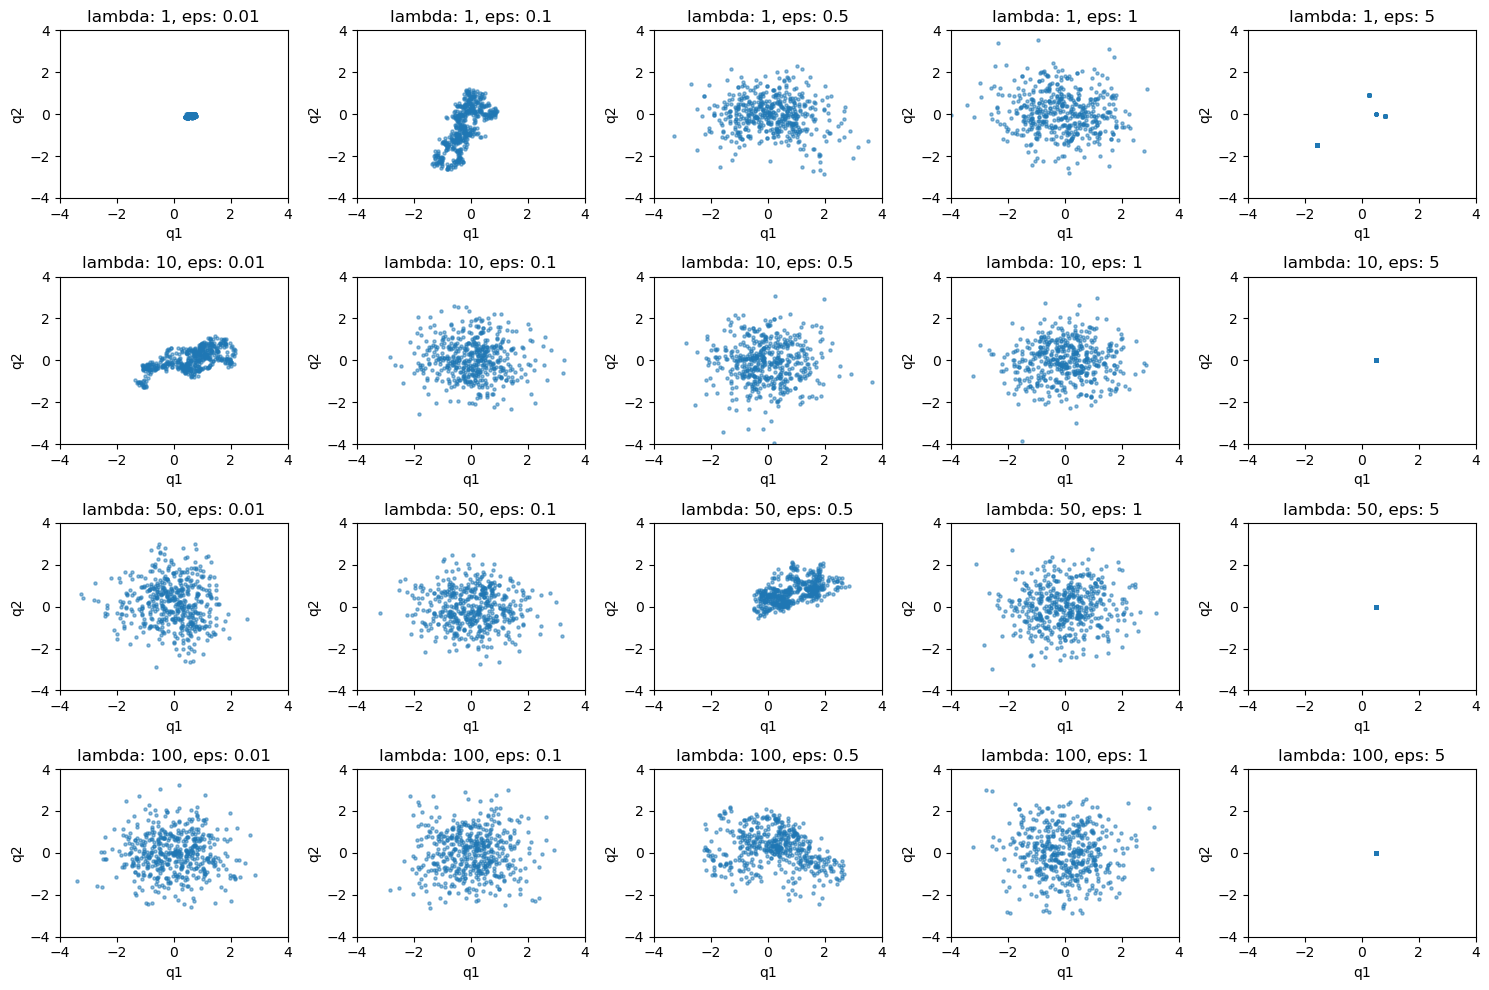

In [9]:
rho = 0
epsilons = [0.01, 0.1,0.5, 1, 5]
lambdas = [1, 10, 50, 100]

fig, axes = plt.subplots(len(lambdas), len(epsilons), figsize=(15, 10))
for i, lambda_ in enumerate(lambdas):
    for j, eps in enumerate(epsilons):
        cov = np.array([[sigma_X**2, rho * sigma_X * sigma_Y], [rho * sigma_X * sigma_Y, sigma_Y**2]])
        samples = hmc(mu, cov, eps, num_samples=500, num_leapfrog_steps=lambda_)
        axes[i, j].scatter(samples[:, 0], samples[:, 1], s=5, alpha=0.5)
        axes[i, j].set_title(f'lambda: {lambda_}, eps: {eps}')
        axes[i, j].set_xlim(-4, 4)
        axes[i, j].set_ylim(-4, 4)
        axes[i, j].set_xlabel('q1')
        axes[i, j].set_ylabel('q2')
plt.tight_layout()
plt.show()

## for $\rho = 0.8$

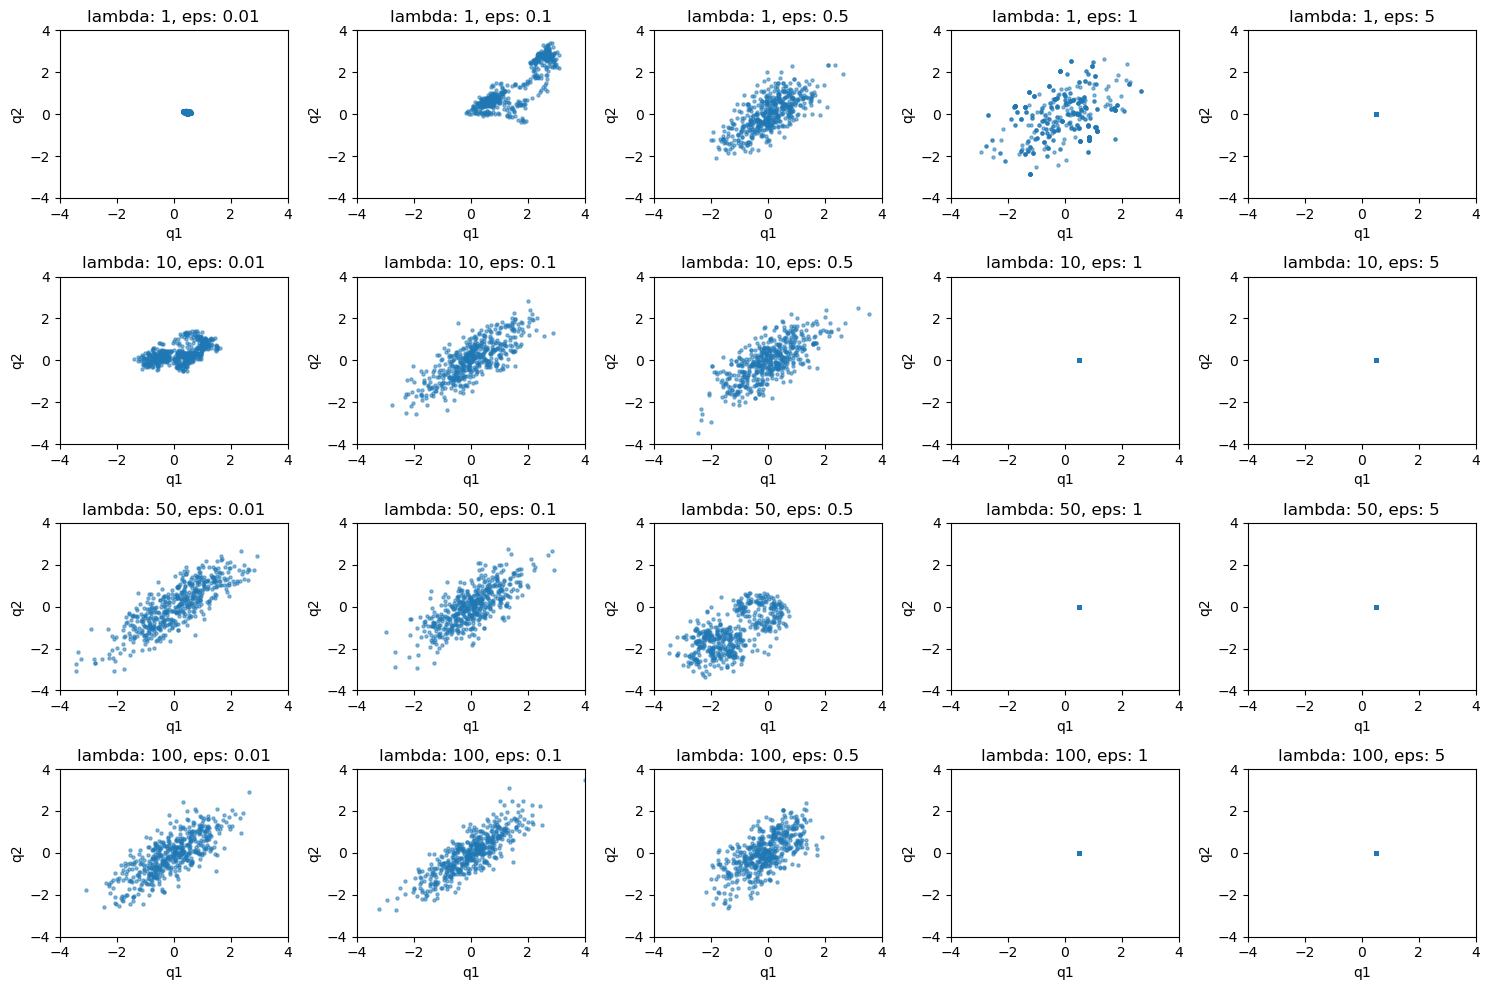

In [10]:
rho = 0.8
epsilons = [0.01,0.1, 0.5, 1, 5]
lambdas = [1, 10, 50, 100]

fig, axes = plt.subplots(len(lambdas), len(epsilons), figsize=(15, 10))
for i, lambda_ in enumerate(lambdas):
    for j, eps in enumerate(epsilons):
        cov = np.array([[sigma_X**2, rho * sigma_X * sigma_Y], [rho * sigma_X * sigma_Y, sigma_Y**2]])
        samples = hmc(mu, cov, eps, num_samples=500, num_leapfrog_steps=lambda_)
        axes[i, j].scatter(samples[:, 0], samples[:, 1], s=5, alpha=0.5)
        axes[i, j].set_title(f'lambda: {lambda_}, eps: {eps}')
        axes[i, j].set_xlim(-4, 4)
        axes[i, j].set_ylim(-4, 4)
        axes[i, j].set_xlabel('q1')
        axes[i, j].set_ylabel('q2')
plt.tight_layout()
plt.show()